In [26]:
import pandas as pd  # 字典形式
import numpy as np  # 列表形式

# pandas数据结构
# Series
s = pd.Series([1, 3, 6, np.nan, 44, 1])
print(s)  # => key[0:n-1]    value
          #    dtype:float64(默认)

# DataFrame
dates = pd.date_range('20160101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates,  # 行索引
                  columns=['a', 'b', 'c', 'd'])  # 列索引
print(df)
print(df['b'])
df1 = pd.DataFrame(np.arange(12).reshape(3, 4))
print(df1)  # 默认行索引，列索引[0:n-1]
df2 = pd.DataFrame({'A' : 1,
                    'B' : pd.Timestamp('20130101'),
                    'C' : pd.Series(1, index=list(range(4)), 
                                    dtype='float32'),
                    'D' : np.array([3] * 4, dtype='int32'),
                    'E' : pd.Categorical(["test", "train", 
                                          "test", "train"]),
                    'F' : "foo"})
print(df2)

print(df2.dtypes)  # 查看每列属性
print(df2.index)  # 查看列序号
print(df2.columns)  # 查看列名称
print(df2.values)  # 查看值
print(df2.describe())  # 查看数据总结
print(df2.T)  # 转置 df2.transpose()
print(df2.sort_index(axis=1, ascending=False))  # 对索引排序
print(df2.sort_values(by='B'))  # 对值排序

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64
                   a         b         c         d
2016-01-01  0.268572  1.293237 -0.509062 -1.800973
2016-01-02  2.470680  0.772067  1.275288  1.853552
2016-01-03 -0.045929  0.702359  0.274285  0.893821
2016-01-04  0.095542  2.177834 -1.367275  0.248140
2016-01-05  1.870478 -0.693190  1.100384 -1.959307
2016-01-06 -1.412014  1.016316 -1.012341 -0.600750
2016-01-01    1.293237
2016-01-02    0.772067
2016-01-03    0.702359
2016-01-04    2.177834
2016-01-05   -0.693190
2016-01-06    1.016316
Freq: D, Name: b, dtype: float64
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
   A          B    C  D      E    F
0  1 2013-01-01  1.0  3   test  foo
1  1 2013-01-01  1.0  3  train  foo
2  1 2013-01-01  1.0  3   test  foo
3  1 2013-01-01  1.0  3  train  foo
A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object
Int64Index([0, 1, 2

In [43]:
# pandas筛选数据
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)), 
                  index=dates, columns=['A', 'B', 'C', 'D'])
# 根据行索引选择数据
print(df)
print(df['A'])
print(df.A)
print(df[0:3])
# 根据标签选择数据
print(df.loc['20130102'])
print(df.loc[:,['A', 'B']])  # :表示所有行
print(df.loc['20130102',['A']])
# 根据序列选择数据
print(df.iloc[3,1])  # 单个数据
print(df.iloc[3:5, 1:3])  # 连续数据
print(df.iloc[[1, 3, 5], 1:3])  # 跨行数据
# 混合选择(已失效)
# print(df.ix[:3,['A','C']])
# 通过判断筛选
print(df[df.A>8])

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int64
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int64
            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11
A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int64
             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21
A    4
Name: 2013-01-02 00:00:00, dtype: int64
13
             B   C
2013-01-04  13  14
2013-01-05  17  18
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22
             A   B   C   D
2013-01-04  12  13  14  15
2013-01

In [68]:
# pandas创建数据
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)),
                 index=dates, columns=['A', 'B', 'C', 'D'])
print(df)
# 根据位置设置值
df.iloc[2, 2] = 1111
print(df)
df.loc['20130102', 'B'] = 2222
print(df)
# 根据条件设置值
df.B[df.A>4] = 0
print(df)
# 根据列设置值
df['E'] = np.nan  # NaN
print(df)
# 添加数据
df['F'] = pd.Series([1, 2, 3, 4, 5, 6], 
                    index=pd.date_range('20130102', periods=6))
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
             A   B     C   D
2013-01-01   0   1     2   3
2013-01-02   4   5     6   7
2013-01-03   8   9  1111  11
2013-01-04  12  13    14  15
2013-01-05  16  17    18  19
2013-01-06  20  21    22  23
             A     B     C   D
2013-01-01   0     1     2   3
2013-01-02   4  2222     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23
             A     B     C   D
2013-01-01   0     1     2   3
2013-01-02   4  2222     6   7
2013-01-03   8     0  1111  11
2013-01-04  12     0    14  15
2013-01-05  16     0    18  19
2013-01-06  20     0    22  23
             A     B     C   D   E
2013-01-01   0     1     2   3 NaN
2013-01-02   4  2222     6   7 NaN
2013-01-03   8     0  1111  11 NaN
2013-01-04  12     0    14  15 NaN

In [85]:
# pandas处理丢失数据
# 创建含NaN的矩阵
dates = pd.date_range('20180101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6, 4)),
                 index=dates, columns=['A', 'B', 'C', 'D'])
df.iloc[0, 0] = np.nan
df.iloc[1, 1] = np.nan
print(df)
# 去除有缺失的行或列
print(df.dropna(
    axis=0,  # 0:对行操作, 1:对列操作
    how='any'  # any:只要有NaN就去除, all:全部是NaN才去除
))
# 替代缺失值
print(df.fillna(value=0))
# 打印缺失位
print(df.isnull())
# 检测是否有缺失
print(np.any(df.isnull()) == True)

               A     B   C   D
2018-01-01   NaN   1.0   2   3
2018-01-02   4.0   NaN   6   7
2018-01-03   8.0   9.0  10  11
2018-01-04  12.0  13.0  14  15
2018-01-05  16.0  17.0  18  19
2018-01-06  20.0  21.0  22  23
               A     B   C   D
2018-01-03   8.0   9.0  10  11
2018-01-04  12.0  13.0  14  15
2018-01-05  16.0  17.0  18  19
2018-01-06  20.0  21.0  22  23
               A     B   C   D
2018-01-01   0.0   1.0   2   3
2018-01-02   4.0   0.0   6   7
2018-01-03   8.0   9.0  10  11
2018-01-04  12.0  13.0  14  15
2018-01-05  16.0  17.0  18  19
2018-01-06  20.0  21.0  22  23
                A      B      C      D
2018-01-01   True  False  False  False
2018-01-02  False   True  False  False
2018-01-03  False  False  False  False
2018-01-04  False  False  False  False
2018-01-05  False  False  False  False
2018-01-06  False  False  False  False
True


In [89]:
# pandas导入导出数据
# pandas可以读写多种格式的数据：csv,excel,json,html,pickle
# 读取(read_格式名(‘文件名’)) csv为excel最原始格式
data = pd.read_csv('student.csv')
print(data)
# 存储(to_格式名('文件名'))
data.to_pickle('student.pickle')

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


In [111]:
# pandas array合并
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3, 4)) * 2, columns=['a', 'b', 'c', 'd'])
# concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)  # axis默认为0
print(res)
# concat横向合并
res = pd.concat([df1, df2, df3], axis=1)
print(res)
# ignore_index重置索引，默认为False
res = pd.concat([df1, df2, df3], ignore_index=True)
print(res)
# join合并,默认为outer
# 相同列名的列会合并,不同的会新建,没有值的位置设为NaN
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['b', 'd', 'e', 'f'])
res = pd.concat([df1, df2], axis=0, join='outer', sort=False)  
# 必须要加上sort参数
print(res)
# join_axes(依照axes合并)
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
print(res)
res = pd.concat([df1, df2], axis=1)
print(res)
# append添加数据（只有纵向合并，没有横向合并）
df1 = pd.DataFrame(np.ones((3, 4)) * 0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4)) * 1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3, 4)) * 2, columns=['a', 'b', 'c', 'd'])
res = df1.append([df2, df3], ignore_index=True)
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
print(res)
res = res.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d    a    b    c    d    a    b    c    d
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
1  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0
     a    b    c    d    e    f
0  0.0  0.0  0.0  0.0  NaN  NaN
1  0.0  0.0  0.0  0.0  NaN  NaN
2  0.0  0.0  0.0  0.0  NaN  NaN
0  NaN  1.0  NaN  1.0  1.0  1.0
1  NaN  1.0  NaN  1.0  1.0  1.0
2  NaN  1.0  NaN  1.0  1.0  1.0
     a    b    c    d    b    d    e    f
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
1  0

In [125]:
# 依据一组key合并
left = pd.DataFrame({'key' : ['K0', 'K1', 'K2', 'K3'],
                     'A' : ['A0', 'A1', 'A2', 'A3'],
                     'B' : ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key' : ['K0', 'K1', 'K2', 'K3'],
                      'C' : ['A0', 'A1', 'A2', 'A3'],
                      'D' : ['B0', 'B1', 'B2', 'B3']})
print(left)
print(right)
res = pd.merge(left, right, on='key')
print(res)
# 依据两组key合并
left = pd.DataFrame({'key1' : ['K0', 'K1', 'K2', 'K3'],
                     'key2' : ['K0', 'K1', 'K0', 'K1'],
                     'A' : ['A0', 'A1', 'A2', 'A3'],
                     'B' : ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1' : ['K0', 'K1', 'K2', 'K3'],
                      'key2' : ['K0', 'K1', 'K0', 'K1'],
                      'C' : ['A0', 'A1', 'A2', 'A3'],
                      'D' : ['B0', 'B1', 'B2', 'B3']})
print(left)
print(right)
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)
# indicator=True会将合并的记录放在新的一列
df1 = pd.DataFrame({'col1' : [0, 1],
                    'col_left' : ['a', 'b']})
df2 = pd.DataFrame({'col1' : [1, 2, 2],
                    'col_right' : [2, 2, 2]})
print(df1)
print(df2)
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)
# 自定indicator column名称
res = pd.merge(df1, df2, on='col1', how='outer', 
               indicator='indicator_column')
print(res)
# 依据index合并
left = pd.DataFrame({'A' : ['A0', 'A1', 'A2'],
                     'B' : ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C' : ['C0', 'C1', 'C2'],
                      'D' : ['D0', 'D1', 'D2']},
                      index=['K0', 'K2', 'K3'])
print(left)
print(right)
# outer合并
res = pd.merge(left, right, left_index=True, 
               right_index=True, how='outer')
print(res)
# inner合并
res = pd.merge(left, right, left_index=True, 
               right_index=True, how='inner')
print(res)
# 通过后缀，解决overlapping的问题
boys = pd.DataFrame({'k' : ['K0', 'K1', 'K2'],
                     'age' : [1, 2, 3]})
girls = pd.DataFrame({'k' : ['K0', 'K0', 'K3'],
                      'age' : [4, 5, 6]})
print(boys)
print(girls)
res = pd.merge(boys, girls, on='k', 
               suffixes=['_boys', '_girl'], how='outer')
print(res)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   A   B   C   D
0  K0  A0  B0  A0  B0
1  K1  A1  B1  A1  B1
2  K2  A2  B2  A2  B2
3  K3  A3  B3  A3  B3
  key1 key2   A   B
0   K0   K0  A0  B0
1   K1   K1  A1  B1
2   K2   K0  A2  B2
3   K3   K1  A3  B3
  key1 key2   C   D
0   K0   K0  A0  B0
1   K1   K1  A1  B1
2   K2   K0  A2  B2
3   K3   K1  A3  B3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  A0  B0
1   K1   K1  A1  B1  A1  B1
2   K2   K0  A2  B2  A2  B2
3   K3   K1  A3  B3  A3  B3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  A0  B0
1   K1   K1  A1  B1  A1  B1
2   K2   K0  A2  B2  A2  B2
3   K3   K1  A3  B3  A3  B3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  A0  B0
1   K1   K1  A1  B1  A1  B1
2   K2   K0  A2  B2  A2  B2
3   K3   K1  A3  B3  A3  B3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  A0  B0
1   K1   K1  A1  B1  A1  B1
2   K2   K0  A2  B2  A2  B2
3   K3   K1  A3  B

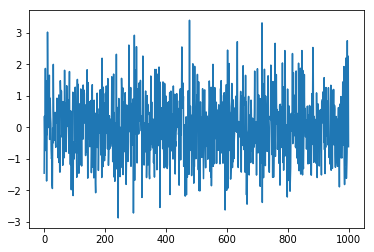

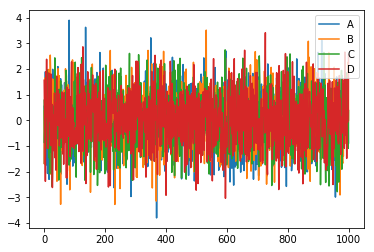

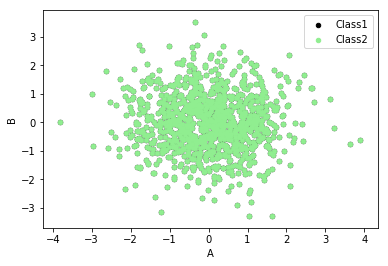

In [135]:
# pandas借助matplotlib可视化
import matplotlib.pyplot as plt
# Series可视化
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
data.cumsum()
data.plot()
plt.show()

# DataFrame可视化
# 线形图
data = pd.DataFrame(np.random.randn(1000, 4),
                    index=np.arange(1000),
                    columns=list("ABCD"))
data.cumsum()
data.plot()
plt.show()

# 散点图
ax = data.plot.scatter(x='A', y='B', color='Black', label='Class1')
data.plot.scatter(x='A', y='B', color='LightGreen', label='Class2', ax=ax)
plt.show()
data.plot.scatter(x='A', y='B', color='LightGreen', label='Class2', ax=ax)
plt.show()